<a href="https://colab.research.google.com/github/lonen8188/AIStudy25/blob/master/Roboflow_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📦 YOLOv8 객체 탐지를 위한 사용자 정의 데이터셋 학습 방법

[![Roboflow 블로그 글](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)  
[![YouTube 튜토리얼](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)  
[![GitHub 저장소](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

---

## 📝 함께 보면 좋은 블로그 글

이 노트북을 따라가면서 [블로그 글](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/)을 같이 읽는 것을 추천합니다.

---

## 🚀 팁: GPU 가속 활성화하기

Colab에서 실행 중이라면 다음과 같이 설정하세요:

- 메뉴에서 `수정` → `노트북 설정` 클릭  
- `하드웨어 가속기`를 `GPU`로 변경  
- `저장` 클릭  

이렇게 하면 모델 학습 속도가 훨씬 빨라집니다!

---

## 📚 튜토리얼 순서

이 튜토리얼에서는 다음과 같은 과정을 다룹니다:

1. 시작 전에 (**GPU 환경**)
2. YOLOv8 설치 (**모델 선택**)
3. CLI 기본 사용법(**사용법**)
4. 사전 학습된 COCO 모델로 추론(**연습**)
5. Roboflow Universe (**데이터 가공**)
6. 사용자 정의 데이터셋 준비(**7200장의 데이터,63개의 클래스**)
7. 사용자 정의 학습(**하이퍼 파라미터 조정**)
8. 사용자 정의 모델 검증(**모델의 퍼포먼스 시각화**)
9. 사용자 정의 모델로 추론(**테스트**)



## ✅ 시작 전에

GPU에 접근할 수 있는지 먼저 확인해봅시다.  
이를 위해 `nvidia-smi` 명령어를 사용할 수 있습니다.

만약 GPU가 작동하지 않는다면, 아래와 같이 설정을 확인하세요:

- 메뉴에서 `수정` → `노트북 설정` 클릭  
- `하드웨어 가속기`를 `GPU`로 설정  
- `저장` 클릭

In [ ]:
!nvidia-smi

Thu Apr 10 08:02:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 🔧 YOLOv8 설치하기

YOLOv8은 두 가지 방법으로 설치할 수 있습니다:

- **소스 코드로부터 직접 설치**
- **pip을 이용한 설치**

이는 YOLO 시리즈 중 처음으로 **공식 패키지**가 제공된 버전이기 때문입니다.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## 🖥️ YOLO 명령어(CLI)로 시작하기

모델을 학습하거나, 검증하거나, 추론만 하고자 한다면  
코드를 수정할 필요 없이 **YOLO 명령줄 인터페이스(CLI)**를 사용하는 것이 가장 간편한 방법입니다.

YOLO CLI에 대한 더 많은 정보는  
[Ultralytics YOLO 공식 문서](https://docs.ultralytics.com/usage/cli/)를 참고하세요.

📌 위 명령어에서:
- `task`: 작업 유형 (`detect`: 객체 탐지, `classify`: 분류, `segment`: 분할)
- `mode`: 실행 모드 (`train`, `val`, `predict`, `export`)
- `model`: 사용할 모델 또는 설정 파일
- `args...`: 추가 인자들 (예: `data`, `epochs`, `img`, `batch` 등)

## Inference with Pre-trained COCO Model

### 💻 CLI

## 🔍 YOLOv8 추론하기 (`predict` 모드)

`yolo mode=predict` 명령어를 사용하면 다양한 입력 소스에 대해 YOLOv8 추론을 실행할 수 있습니다.

이 명령은 **최신 YOLOv8 릴리스에서 모델을 자동으로 다운로드**하며,  
결과는 `runs/predict` 디렉토리에 저장됩니다.

예시:
```bash
yolo task=detect mode=predict model=yolov8n.pt source="이미지 또는 동영상 경로"

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://images.mypetlife.co.kr/content/uploads/2022/12/13122754/AdobeStock_123950862-1024x684.jpeg' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://images.mypetlife.co.kr/content/uploads/2022/12/13122754/AdobeStock_123950862-1024x684.jpeg locally at AdobeStock_123950862-1024x684.jpeg
image 1/1 /content/AdobeStock_123950862-1024x684.jpeg: 448x640 1 person, 1 dog, 59.5ms
Speed: 10.2ms preprocess, 59.5ms inference, 232.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


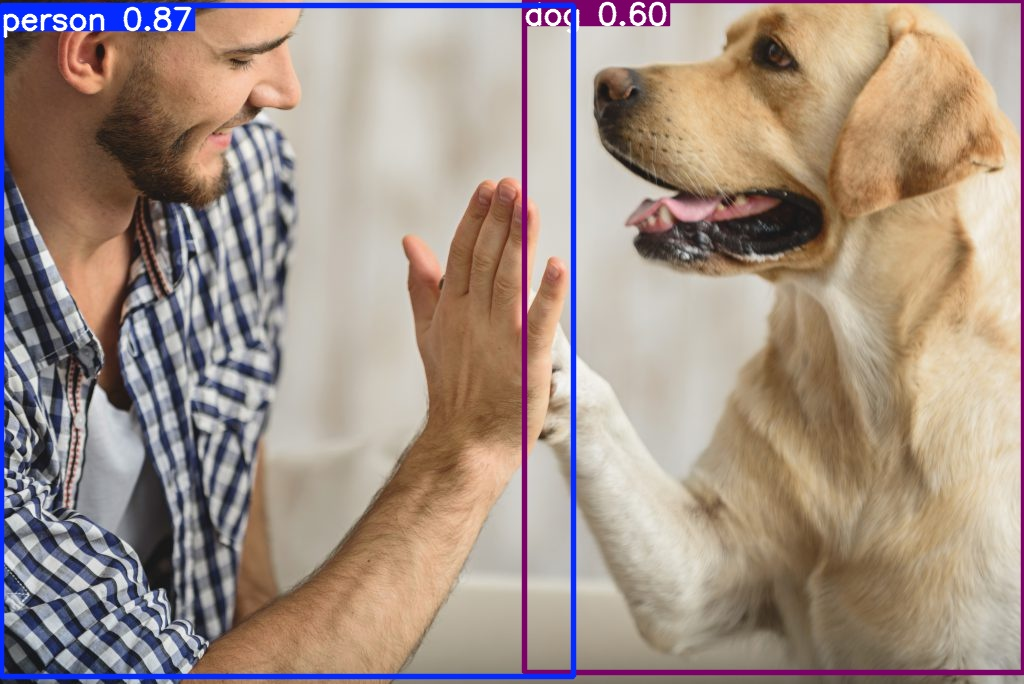

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/AdobeStock_123950862-1024x684.jpeg', height=600)

### 🐍 Python SDK

YOLOv8을 Python 환경에서 직접 사용하는 가장 간단한 방법입니다.

Python 코드를 통해 모델을 불러오고, 학습하거나 추론할 수 있습니다.  
특히 Colab이나 Jupyter 환경에서 유용하게 사용할 수 있습니다.

## 🌌 Roboflow Universe

프로젝트에 사용할 데이터가 필요하신가요?  
시간을 들여 직접 주석(annotation) 작업을 하기 전에,  
**Roboflow Universe**를 확인해보세요!

Roboflow Universe는 **11만 개 이상의 오픈소스 데이터셋 저장소**로,  
콘크리트 균열에 대한 주석부터 식물 질병 이미지까지 다양한 주제를 다룹니다.  
당신의 프로젝트에 바로 활용할 수 있는 고품질 데이터셋들이 가득합니다.






## 📸 사용자 정의 데이터셋 준비하기

사용자 정의 데이터셋을 만드는 과정은 꽤 번거로울 수 있습니다.  
이미지를 수집하고, 라벨링하고, 올바른 형식으로 내보내기까지 수십, 수백 시간이 걸릴 수 있죠.

다행히도 **Roboflow**는 이 과정을 매우 간단하고 빠르게 만들어 줍니다.  
지금부터 그 과정을 단계별로 보여드릴게요!

---

### ✅ 1단계: 프로젝트 생성

시작하려면 먼저 Roboflow에 [회원가입](https://app.roboflow.com/login)해야 합니다.  
회원가입 후에는 [대시보드](https://app.roboflow.com/)에서 새로운 프로젝트를 생성할 수 있습니다.  
**Object Detection(객체 탐지)** 유형을 선택하는 걸 잊지 마세요.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

---

### 📤 2단계: 이미지 업로드

이제 새로 만든 프로젝트에 데이터를 추가합니다.  
Roboflow의 [웹 인터페이스](https://docs.roboflow.com/adding-data/object-detection) 또는 API를 통해 이미지를 업로드할 수 있어요.

지원되는 형식의 데이터셋 디렉토리를 드래그 앤 드롭하면  
**이미지와 주석 파일을 자동으로 인식**합니다.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

---

### 🏷️ 3단계: 이미지 라벨링

이미지만 있다면 Roboflow의 [Annotate 도구](https://docs.roboflow.com/annotate)를 사용해 직접 라벨링할 수 있습니다.

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

---

### 🌀 4단계: 새 데이터셋 버전 생성

이미지와 주석이 모두 준비되었다면, **데이터셋 버전**을 생성할 수 있습니다.  
이 단계에서는 전처리 및 데이터 증강(Augmentation)을 선택적으로 추가할 수 있어  
모델의 성능을 높이는 데 도움이 됩니다.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

---

### 📦 5단계: 데이터셋 내보내기

버전 생성을 완료하면, 해당 데이터셋을 호스팅된 상태로 바로 불러올 수 있게 됩니다.  
`Export` 버튼을 눌러 `YOLOv8` 형식을 선택하세요.  
(*예전에는 YOLOv5를 선택했지만, 이제는 YOLOv8을 사용합니다.*)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>


🟢 **팁(Tip)**:  
아래의 예제들은 **사용자 정의(custom) 모델이 아니더라도** 실행할 수 있습니다.
Roboflow에 회원가입 후,원하는 데이터셋에 대한 API KEY를 발급받아 다운로드하면 쉽게 데이터를 가져올 수 있습니다.
또는 직접 사용자 정의 데이터셋을 만들거나, Roboflow Universe에서 원하는 데이터셋을 **fork(복사)**하여 작업 공간으로 가져와야 합니다.

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6xGhq6O1ba48NbaMJkyW")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(9)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-9 in yolov8:: 100%|██████████| 34814/34814 [00:15<00:00, 2228.86it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 255MB/s]
New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/People-Detection-9/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

/content


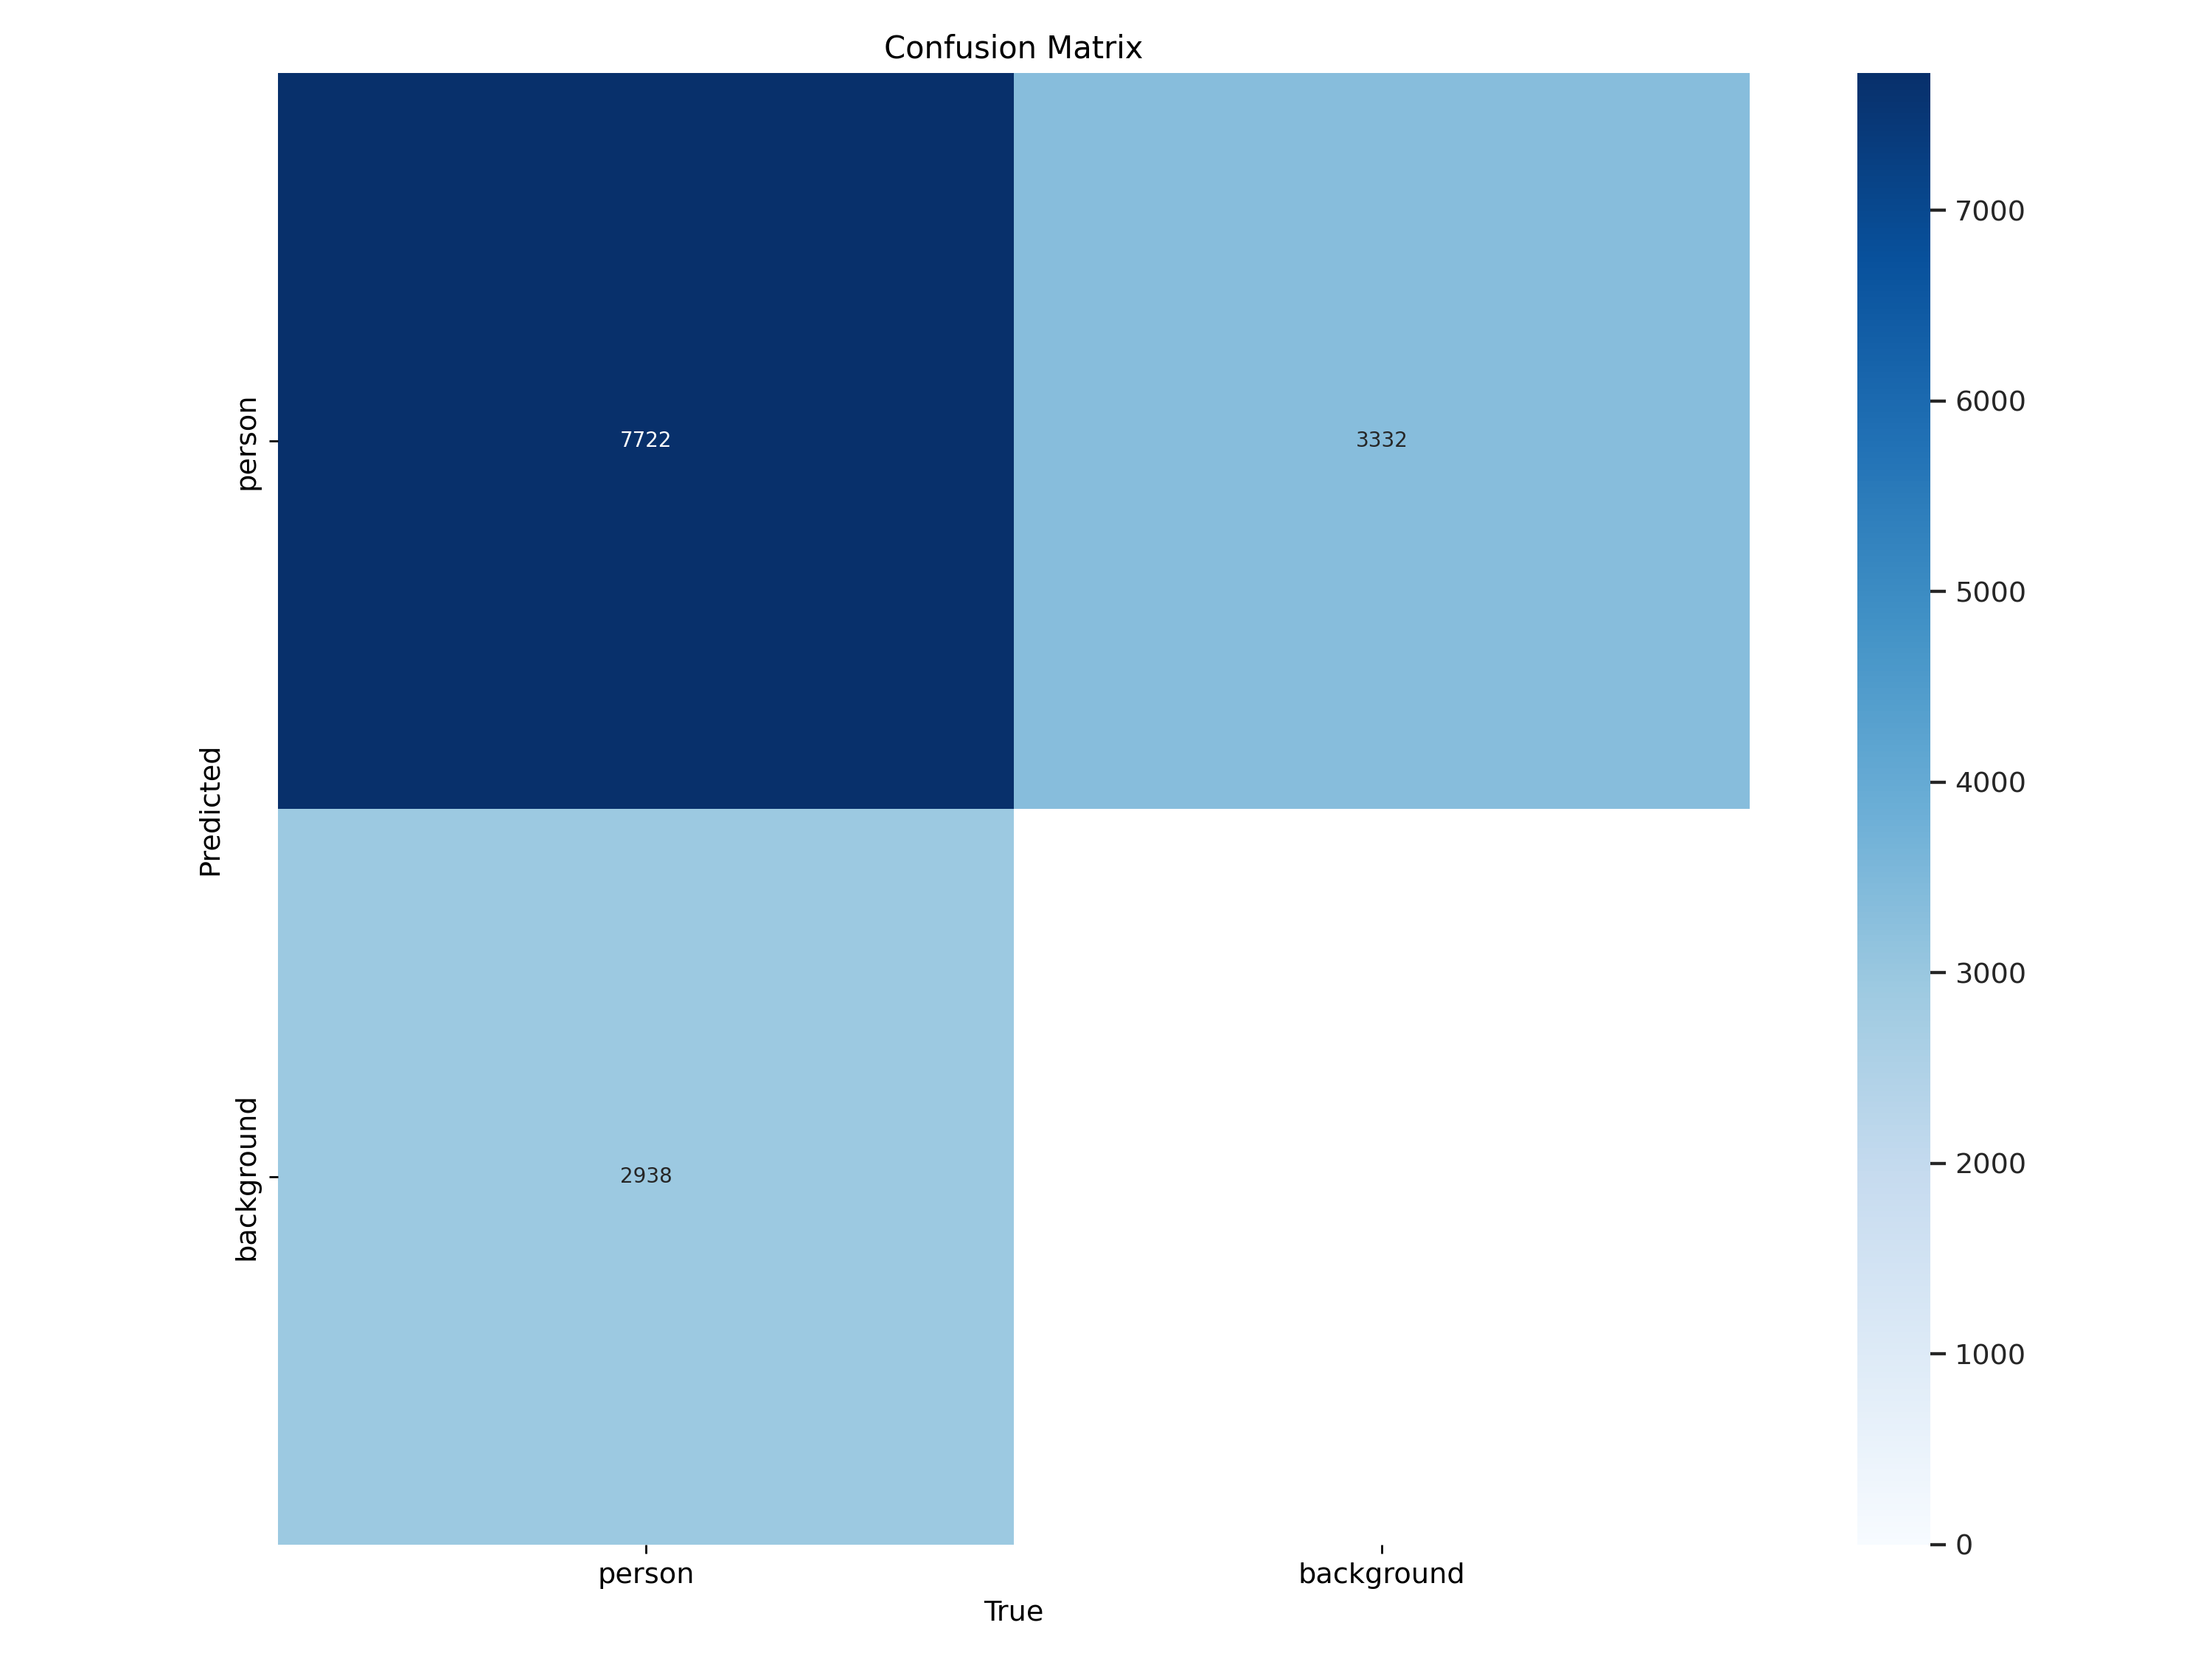

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


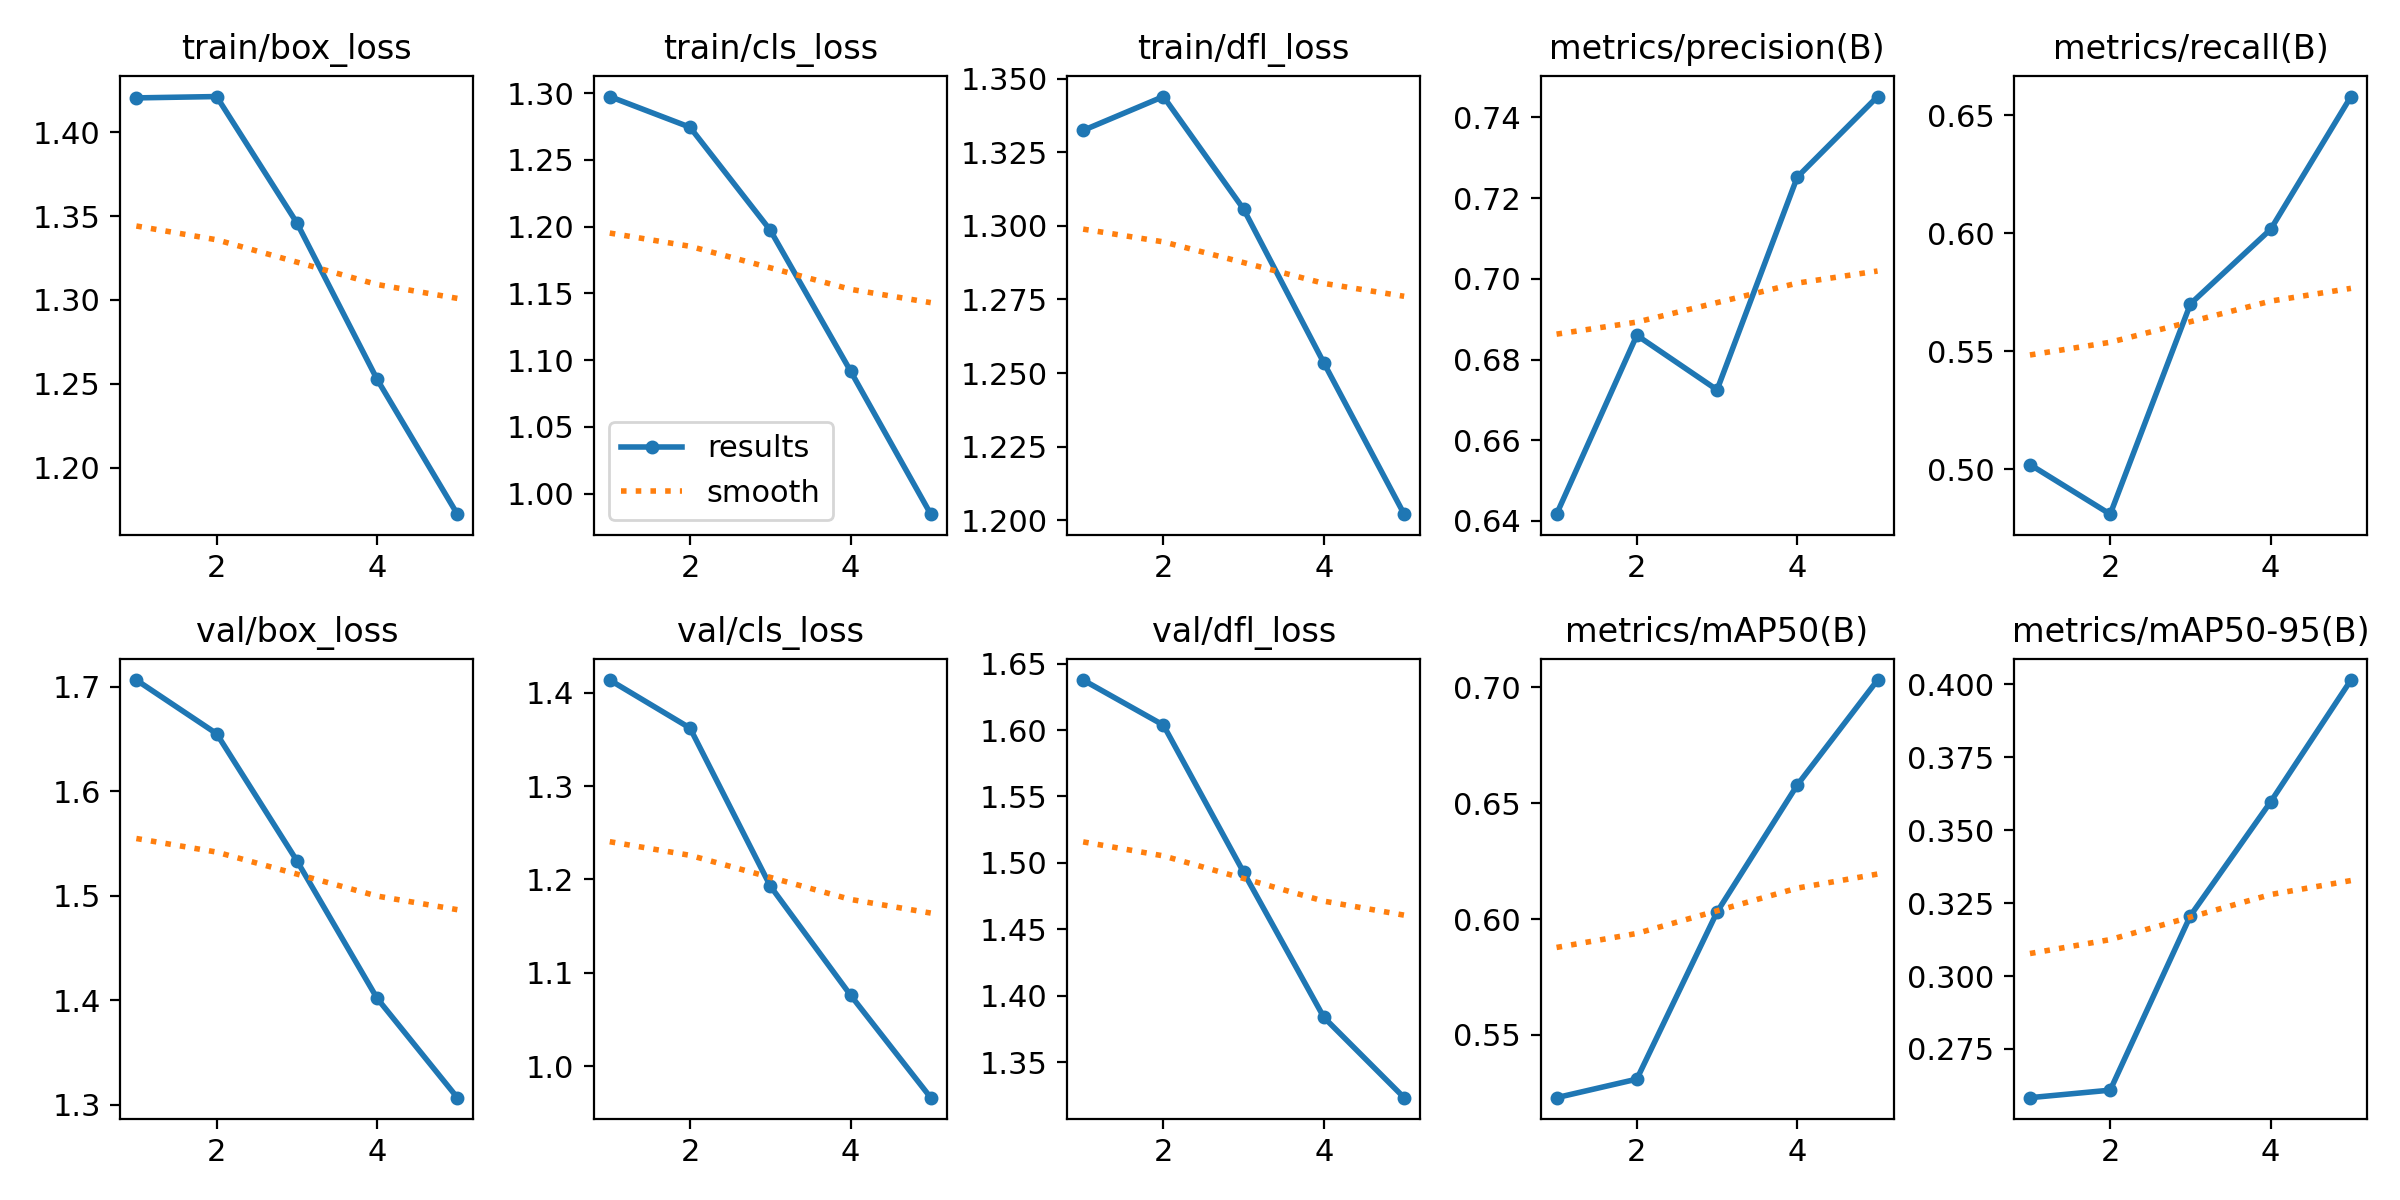

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


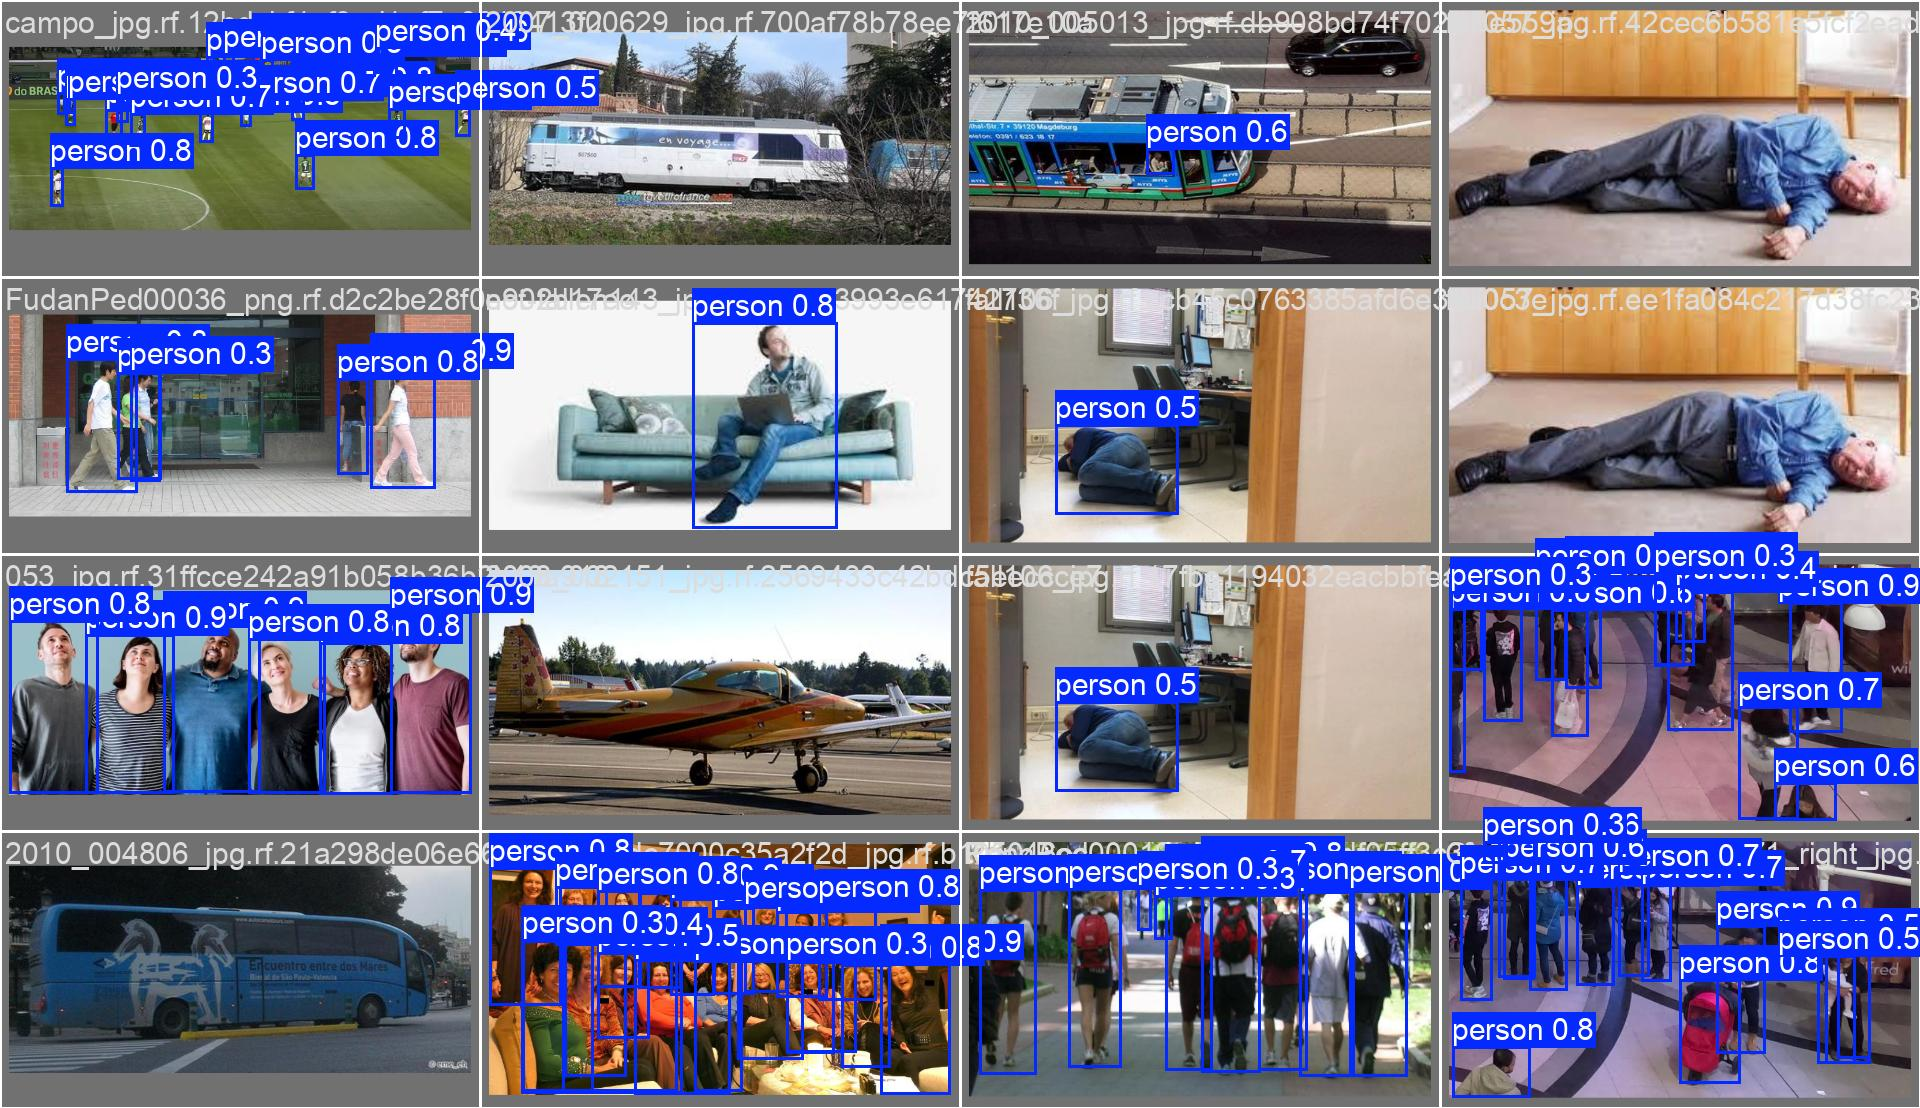

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/People-Detection-9/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100% 1431/1431 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/People-Detection-9/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 90/90 [00:24<00:00,  3.65it/s]
                   all       1431      10660      0.745      0.659      0.704      0.402
Speed: 0.9ms preproce

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/760 /content/datasets/People-Detection-9/test/images/0000540_jpg.rf.d1b964542ac8df27835f1348ebcac01a.jpg: 608x800 2 persons, 36.8ms
image 2/760 /content/datasets/People-Detection-9/test/images/000054_r-2_jpg.rf.23723f3554a328733717247da135acc8.jpg: 608x800 2 persons, 18.3ms
image 3/760 /content/datasets/People-Detection-9/test/images/000070_jpg.rf.5898e9817249586892b429970c485b29.jpg: 480x800 43 persons, 43.5ms
image 4/760 /content/datasets/People-Detection-9/test/images/000071_jpg.rf.b134f02af03ac3e9ada819f9010aebce.jpg: 480x800 43 persons, 15.6ms
image 5/760 /content/datasets/People-Detection-9/test/images/000075_jpg.rf.81b226a4f4ca1e5463ba31e203c9a029.jpg: 480x800 46 persons, 15.5ms
image 6/760 /content/datasets/People-Detection-9/test/images/000077_jpg.rf.86614d2155ccf19053745e610adca4ab.jpg: 480

**NOTE:** Let's take a look at few results.

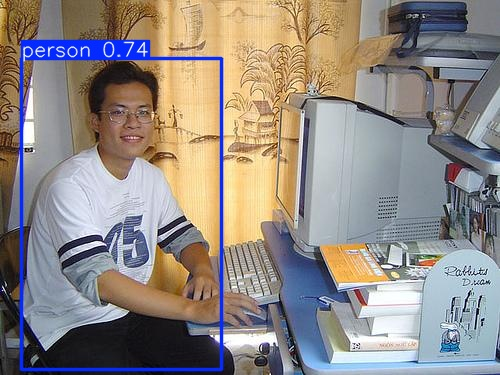

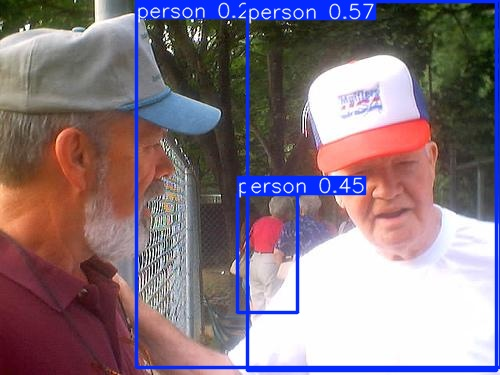

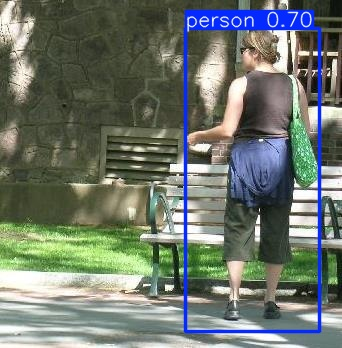

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 2007_000346_jpg.rf.3869abb347c0b1e71d40ed0b7c32237b.jpg


{'predictions': [{'x': 316.8310546875,
   'y': 225.95731735229492,
   'width': 358.67510986328125,
   'height': 296.10062408447266,
   'confidence': 0.9785849452018738,
   'class': 'person',
   'class_id': 1,
   'detection_id': '17d5f815-d110-45a1-accc-55c9edc914e7',
   'image_path': '/content/datasets/People-Detection-9/test/images/2007_000346_jpg.rf.3869abb347c0b1e71d40ed0b7c32237b.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 89.75204086303711,
   'y': 234.0981674194336,
   'width': 40.26801300048828,
   'height': 53.42414855957031,
   'confidence': 0.9062936902046204,
   'class': 'person',
   'class_id': 1,
   'detection_id': '4231df87-511f-4cc7-b68a-06a422f546c3',
   'image_path': '/content/datasets/People-Detection-9/test/images/2007_000346_jpg.rf.3869abb347c0b1e71d40ed0b7c32237b.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 108.29293060302734,
   'y': 222.18113708496094,
   'width': 44.39866638183594,
   'height': 44.069854736328125,
   'confidence'

# 📘 실습 과제 안내 (YOLOv8)

# 이번 YOLOv8 실습을 바탕으로, 아래 주제들에 대해 직접 실험하고 분석해보는 과제를 수행하세요.
# 각 항목에 대해 코드 + 결과 해석 + 시각화 + 설명이 포함되어야 합니다.

# ------------------------------------------------------------

# ✅ 1. 데이터 전처리 및 불러오기
# - YOLOv8이 요구하는 형식에 맞게 데이터를 전처리하고, 불러오는 전체 과정을 코드로 보여주세요.
# - 주석 파일(.txt) 형식 설명 및 클래스 ID/좌표가 어떻게 구성되는지 이해하고 설명하세요.

# ------------------------------------------------------------

# ✅ 2. 데이터셋 자유롭게 활용
# - Roboflow에서 직접 원하는 데이터셋을 선택하거나,
#   기존 프로젝트에서 필요한 일부 클래스만 선택해서 새 데이터셋을 구성해보세요.
# - 데이터를 분석하고, 다양한 조건으로 필터링하거나 수정해보세요.
# - 새로운 데이터셋 버전을 생성하고 다운로드하는 과정을 설명하세요.

# ------------------------------------------------------------

# ✅ 3. 모델 불러오기 및 파인튜닝
# - best.pt 또는 last.pt로 저장된 YOLOv8 모델을 불러오는 코드를 작성하세요.
# - 불러온 모델을 기반으로 추가 학습(Fine-Tuning)하거나, 다른 데이터셋에 재적용하는 실험을 해보세요.
# - 결과 성능 비교 및 전이학습이 성능에 어떤 영향을 미쳤는지 분석하세요.

# ------------------------------------------------------------

# ✅ 4. 데이터 시각화
# - 학습에 사용할 이미지 및 바운딩 박스를 시각화해보세요.
# - 데이터 증강(augmentation)이 적용된 예제도 함께 시각화하면 좋습니다.
# - 학습 중 모델의 성능 향상을 확인할 수 있는 시각화 결과(mAP 그래프 등)를 함께 포함하세요.

# ------------------------------------------------------------

# ✅ 5. 하이퍼파라미터 조정 실험
# - epochs, batch, imgsz, lr0, weight_decay 등 YOLOv8의 학습 파라미터를 변경하여 실험해보세요.
# - 과적합을 방지하고, 최상의 성능을 낼 수 있도록 하이퍼파라미터 튜닝 과정을 설명하세요.
# - 성능 평가 지표 (Precision, Recall, mAP 등) 도표 또는 수치로 비교하세요.

# ------------------------------------------------------------

# ✅ 6. 결과 데이터 가공 및 활용
# - 모델 추론 결과는 runs/predict 디렉토리에 이미지와 .txt로 저장됩니다.
# - 이 결과 데이터를 불러와서 CSV 또는 JSON 형태로 변환해보세요.
# - 클래스별 탐지 개수, 객체 위치 평균, 신뢰도(Confidence) 분포 등을 가공/분석하여 시각화하세요.
# - 예: 특정 클래스가 가장 자주 탐지된 이미지, 신뢰도 높은 탐지 Top 5 등
# 💡 Pandas, JSON, CSV, glob, os 모듈을 활용하면 가공이 편리합니다.

# ------------------------------------------------------------

# 📌 제출 형식 안내
# - .ipynb 형태로 실습 내용을 정리하여 제출하세요.
# - 모든 코드 셀에 충분한 주석과 설명을 달아주세요.
# - 시각화 결과는 이미지로 남기고, 해석도 포함해주세요.
# - 마무리 셀에 전체 프로젝트 회고 및 느낀 점을 정리하세요.
